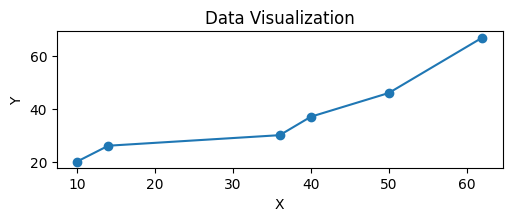

In [1]:
# 1. Import necessary libraries
import tkinter as tk  # tkinter for GUI
from tkinter import ttk  # ttk for themed widgets
import matplotlib.pyplot as plt  # matplotlib for plotting
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg  # TkAgg backend for embedding plots in tkinter

class DataVisualizationApp:  # Class for the data visualization application
    def __init__(self, root):  # Constructor method
        self.root = root  # Root window
        self.root.title("Data Visualization App")  # Set title of the window
        self.table_data = []  # List to store data

        # Frame for the table
        self.table_frame = ttk.Frame(root)
        self.table_frame.pack(pady=10)

        # Treeview widget for displaying data in a table format
        self.table = ttk.Treeview(self.table_frame, columns=("X", "Y"))
        self.table.column("#0", width=0, stretch=tk.NO)
        self.table.column("X", anchor=tk.CENTER, width=100)
        self.table.column("Y", anchor=tk.CENTER, width=100)
        self.table.heading("#0", text="", anchor=tk.CENTER)
        self.table.heading("X", text="X", anchor=tk.CENTER)
        self.table.heading("Y", text="Y", anchor=tk.CENTER)
        self.table.pack()

        # Entry fields for user input
        self.x_entry = ttk.Entry(root)
        self.x_entry.pack()
        self.y_entry = ttk.Entry(root)
        self.y_entry.pack()

        # Buttons for adding data and plotting
        self.add_button = ttk.Button(root, text="Add Data", command=self.add_data)
        self.add_button.pack()
        self.plot_button = ttk.Button(root, text="Plot Data", command=self.plot_graph)
        self.plot_button.pack()

        # Matplotlib figure and canvas for plotting
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas.get_tk_widget().pack()

    def add_data(self):  # Method to add data to the table
        x = float(self.x_entry.get())  # Get X value from entry field
        y = float(self.y_entry.get())  # Get Y value from entry field
        self.table_data.append((x, y))  # Append data to the list
        self.table.insert("", tk.END, values=(x, y))  # Insert data into the table
        self.x_entry.delete(0, tk.END)  # Clear X entry field
        self.y_entry.delete(0, tk.END)  # Clear Y entry field

    def plot_graph(self):  # Method to plot the graph
        if self.table_data:  # Check if data exists
            self.ax.clear()  # Clear previous plot
            x_values = [data[0] for data in self.table_data]  # Extract X values
            y_values = [data[1] for data in self.table_data]  # Extract Y values
            self.ax.plot(x_values, y_values, marker='o')  # Plot data
            self.ax.set_xlabel("X")  # Set X-axis label
            self.ax.set_ylabel("Y")  # Set Y-axis label
            self.ax.set_title("Data Visualization")  # Set plot title
            self.canvas.draw()  # Update canvas with new plot

if __name__ == "__main__":  # Entry point of the program
    root = tk.Tk()  # Create tkinter root window
    app = DataVisualizationApp(root)  # Create instance of DataVisualizationApp
    root.mainloop()  # Start tkinter event loop
